In [1]:
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from datetime import datetime

In [2]:
df = pd.read_csv('Q3_winequalityN.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### type is target

In [3]:
df.type.unique()

array(['white', 'red'], dtype=object)

## preprocessing

In [4]:
df.dropna(inplace=True)

## Embedding

In [5]:
df['type'].replace(['red', 'white'],[0, 1], inplace=True)

In [6]:
df.head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [7]:
colName = df.columns.to_list()
features = colName[1:]
len(features)

12

## Standardize Data

In [8]:
y = df.type
X = df.drop(columns=['type'])

# Standardize Data
object = StandardScaler() 

# standardization 
X = object.fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Sequential Forward Selection

In [9]:
# Define a simple accuracy scoring function
def fit_model_(X_train_subset, X_test_subset, y_train, y_test):
    
    model = KNeighborsClassifier()
    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)
    return accuracy_score(y_test, y_pred)


def sfs(X_train, X_test, y_train, y_test, features, k = 11):
    
    n_samples, n_features = X.shape
    
    selected_features = []
    Err = []
    
    start=datetime.now()
    while len(selected_features) < k:
        scores = []
        
        for feature in range(n_features): # score of each feature
            if feature not in selected_features:
                subset = selected_features + [feature]
                X_train_subset = X_train[:, subset]
                X_test_subset = X_test[:, subset]
                score = fit_model_(X_train_subset, X_test_subset, y_train, y_test)
                scores.append((score, feature))
        
        # Sort the features by their scores
        scores = sorted(scores, reverse=True)
        
        # Select the best feature
        best_score, best_feature = scores[0]
        selected_features.append(best_feature)
        Err.append( 1 - best_score )
        
        print("Selected feature %d with score %f" % (best_feature, best_score))
    t = datetime.now()-start
    
    for i in selected_features:
        print(features[i])
    
    print ("Time",t.total_seconds() * 1000)
    
    return  Err


In [10]:
# Select the best 2 features
Err  = sfs(X_train, X_test, y_train, y_test, features)

Selected feature 6 with score 0.922660
Selected feature 4 with score 0.969838
Selected feature 9 with score 0.986852
Selected feature 0 with score 0.989946
Selected feature 8 with score 0.990719
Selected feature 2 with score 0.993039
Selected feature 5 with score 0.994586
Selected feature 3 with score 0.993813
Selected feature 10 with score 0.994586
Selected feature 7 with score 0.995360
Selected feature 1 with score 0.996133
total sulfur dioxide
chlorides
sulphates
fixed acidity
pH
citric acid
free sulfur dioxide
residual sugar
alcohol
density
volatile acidity
Time 1313.502


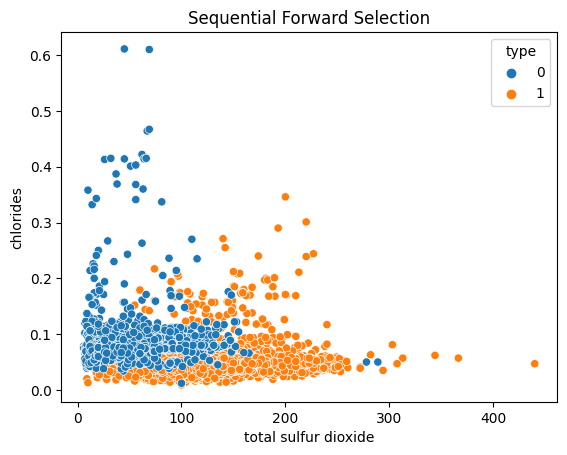

In [11]:
sns.scatterplot(data=df, x="total sulfur dioxide", y="chlorides", hue = 'type')\
.set(title='Sequential Forward Selection');

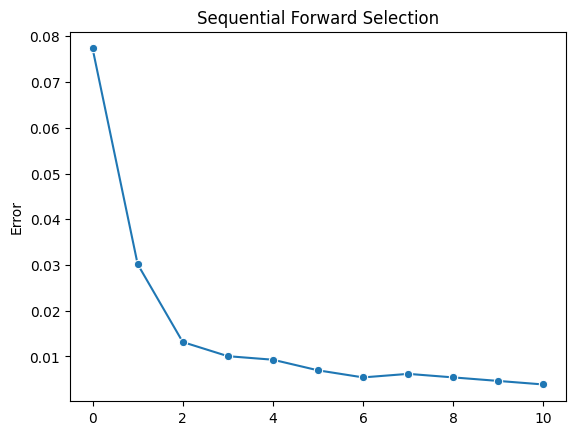

In [12]:
Err = pd.DataFrame(Err,columns=['Error'])
sns.lineplot(data=Err, x = Err.index, y="Error", marker="o").set(title='Sequential Forward Selection');

# Recursive Feature Elimination

In [17]:
def fit_model_(X_train_subset, X_test_subset, y_train, y_test):
    
    model = KNeighborsClassifier()
    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)
    return accuracy_score(y_test, y_pred)


def rfe(X_train, X_test, y_train, y_test, features, k = 2):
    
    n_samples, n_features = X_train.shape
    
    selected_features = list(range(len(features)))
    Err = []
    
    start=datetime.now()
    while len(selected_features) > k:
        scores = []
        
        for feature in selected_features:
            subset = list(set(selected_features) - set([feature]))
            #print(subset)
            X_train_subset = X_train[:, subset]
            X_test_subset = X_test[:, subset]
            score = fit_model_(X_train_subset,X_test_subset, y_train, y_test)
            #print(score)
            scores.append((score, subset))
        
        scores = sorted(scores)
        
        _, best_feature = scores[-1]
        selected_features = best_feature
        Err.append(1 - score)
    
    t = datetime.now()-start
    
    for i in selected_features:
        print(features[i], score)
    
    print ("Time",t.total_seconds() * 1000)
    return Err


In [18]:
# Select the best 2 features
Err  = rfe(X_train, X_test, y_train, y_test, features)

chlorides 0.9435421500386698
total sulfur dioxide 0.9435421500386698
Time 1954.9319999999998


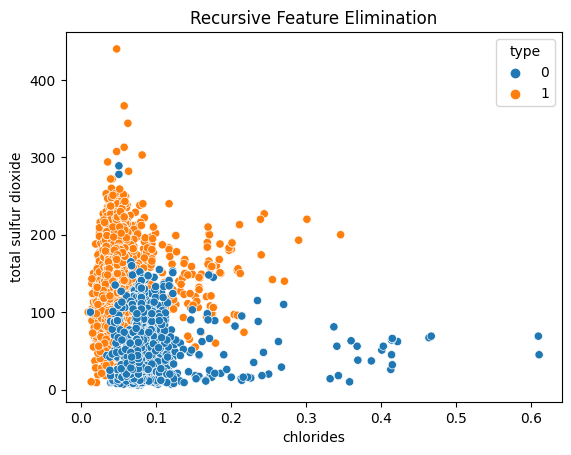

In [15]:
sns.scatterplot(data=df, x="chlorides", y="total sulfur dioxide", hue = 'type')\
.set(title='Recursive Feature Elimination');

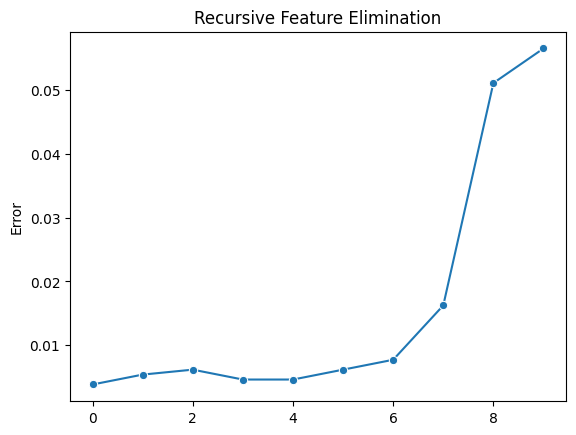

In [16]:
Err = pd.DataFrame(Err,columns=['Error'])
sns.lineplot(data=Err, x = Err.index, y="Error", marker="o").set(title='Recursive Feature Elimination');